<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

---
# Iris Dataset Classification Problem
---


# Table of Content
---
1. [**Introduction**](#Section1)<br>
2. [**Dataset Loading and it's Description**](#Section2)<br>
   2.1 [**Importing Packages**](#Section2.1)<br>
   2.2 [**Importing Dataset**](#Section2.2)<br>
3. [ **Data Profiling**](#Section3)<br>   
4. [ **Data Pre-processing and Cleaning**](#Section4)<br>
5. [**Exploratory Data Analysis**](#Section5)<br>
6. [**Label encoding for categorical variables**](#Section6)<br>
7. [**Splitting X and y into Train and Test datasets**](#Section7)<br>
8. [**Data Scaling**](#Section8)<br>
9. [**Model Creation and Evaluations**](#Section9)<br>
     9.1 [**Logistic Regression**](#Section9.1)<br>
     9.2 [**KNN-K-Nearest Neighbours**](#Section9.2)<br>
     9.3 [**Decision Tree**](#Section9.3)<br>
     9.4 [**SVM with Polynomial Kernel**](#Section9.4)<br>
     9.5 [**SVM with Linear Kernel**](#Section9.5)<br>
10. [**Model Evaluation Results**](#Section10)<br>
11. [**Conclusions**](#Section11)<br>


---
<a name = Section1></a>
## 1. Introduction
---

Iris flower can be divided into 3 species as per the length and width of their Sepals and Petals:<br>

1) Iris Setosa<br>
2) Iris Versicolour<br>
3) Iris Virginica<br>

We have a classification problem in which we need to predict the species of the Iris flower given the sizes of it's Sepals and petals.


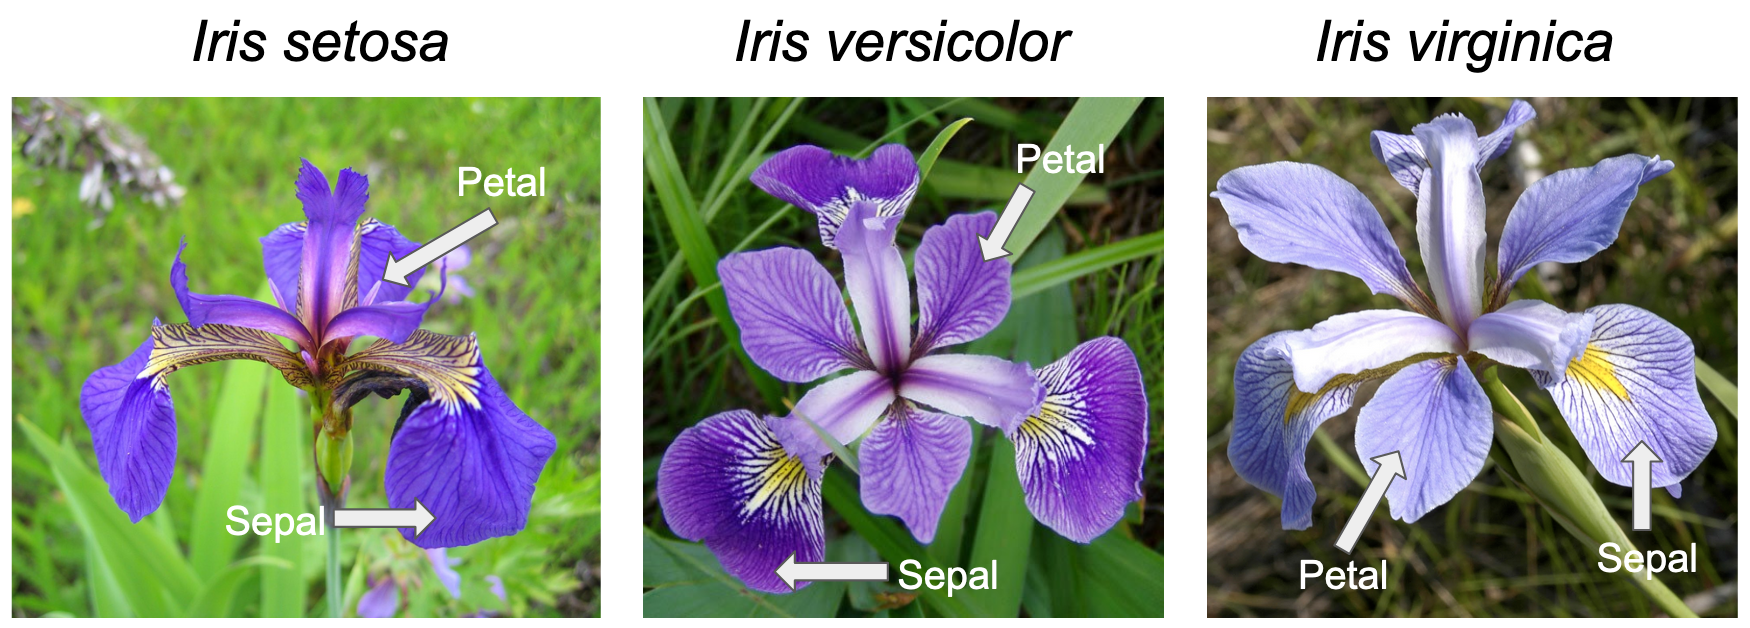

---
<a name = Section2></a>
## 2. Dataset Loading and it's Description


The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

<b>Attribute Information:</b><br>

1. Sepal length in cm
2. Sepal width in cm
3. Petal length in cm
4. Petal width in cm
5. Class:<br> a) Iris Setosa<br> b) Iris Versicolour<br> c) Iris Virginica

|Feature             |Description                            |
|--------------------| --------------------------------------| 
| Id	             |   Unique identity of each observation |
| Sepal length in cm |   Length of the Sepal                 |
| Sepal width in cm  |   Width of the Sepal                  |
| Petal length in cm |   Length of the Petal                 | 
| Petal width in cm  |   Width of the Sepal                  | 
| Species            |   Species of the flower               |


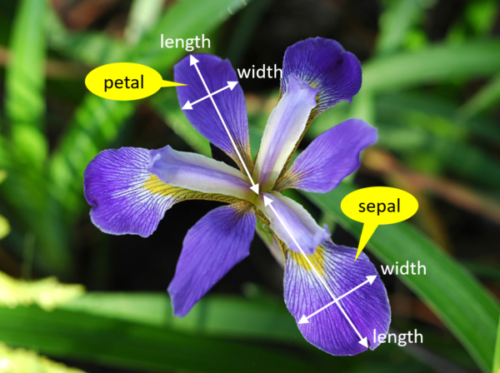

---
<a name = Section2.1></a>
### 2.1 Import Libraries/Packages


In [1]:
# Importing all the relevant packages.

# Importing package pandas (For Panel Data Analysis)
import pandas as pd

# Importing package numpys (For Numerical Python)
import numpy as np

# Importing pyplot interface to use matplotlib
import matplotlib.pyplot as plt

# Importing seaborn library for interactive visualization
import seaborn as sns

# Importing to supress/ filter warnings
import warnings
warnings.filterwarnings('ignore')

# To display the charts in Jupyter notebook only
%matplotlib inline

# Import Pandas Profiling (To generate Univariate Analysis)
from pandas_profiling import ProfileReport 

---
<a name = Section2.2></a>
### 2.2 Loading the dataset

In [2]:
# Importing the dataset using pandas read_csv command.

df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/Iris.csv')
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

<b>Dataset has 6 columns:</b><br>
1) Id<br> 2) SepalLengthCm<br> 3) SepalWidthCm<br> 4) PetalLengthCm<br> 5) PetalWidthCm<br>6) Species

---
<a name = Section3></a>
# **3. Data Profiling**
---

- This section is emphasised on getting a report about the data.

- You need to perform pandas profiling and get some observations out of it...

In [3]:
profile = ProfileReport(df, title=" Pandas Profiling Report for Iris Dataset ")

In [4]:
# Opening the profile report in Jupyter notebook
profile.to_notebook_iframe()

---
<a name = Section4></a>
## 4. Data Pre-processing and Cleaning

In [5]:
#  To get some quick description out of the data you can use describe method defined in pandas library.

df.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

There are 150 rows in the dataset.
Except 'Id' column, there are 4 continuous features.

In [6]:
# Using info function to know the no. of columns, name of columns, datatypes of the columns, and memory usage.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


There are no missing values in any column. Dataset has 4 float variables and 1 object variables, i.e. Species.

In [7]:
# To display no. of samples on each class.

df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

All three species are equally distributed in the dataset, i.e. 50 each.

In [8]:
# Checking the shape of dataset.

df.shape

(150, 6)

Dataset has 150 rows and 6 columns initially.

In [9]:
# Deleting the ID column.

df = df.drop(columns = ['Id'],axis=1)
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

"Id" column was not of much use for doing analysis so dropped it.

In [10]:
# Check for null values in the dataset.

df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null values in all 5 remaining columns.

---
<a name = Section5></a>
## 5. Exploratory Data Analysis

### Histogram

A histogram is a bar graph of raw data that creates a picture of the data distribution. <br>The bar represents the frequency of occurrences by classes of data.<br>

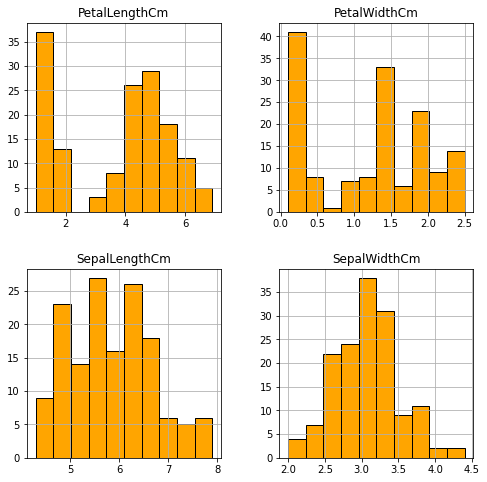

In [11]:
# Plotting histogram of the 4 continuous columns.

df.hist(figsize=(8,8),color = "orange",ec="black")
plt.show()

 These histogram shows distribution of flowers as per length and width of Sepal and Petal


### Scatter Plots

Scatter plots to show the distribution of data points across the two features at a time.


In [12]:
# Plotting Scatterplots seperately for each feature and the dots represented by 3 different colours for the 3 species.

# Creating categories of colours and species.

colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

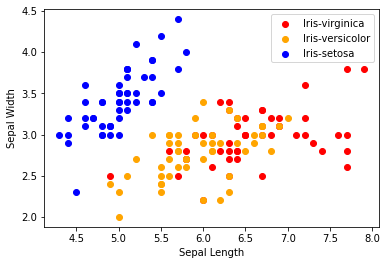

In [13]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

For Sepal length vs Sepal Width scatter plot, Setosa is well seperated, but virginica and versicolour data points are overlapping.

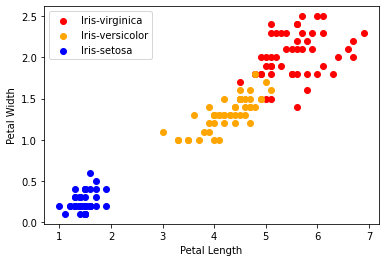

In [14]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

For Petal length vs Petal width scatter plot, Setosa is again well seperated, but virginica and versicolour data points are still overlapping, although much better seperated as compared with Sepal length vs Sepal Width scatter plot. 

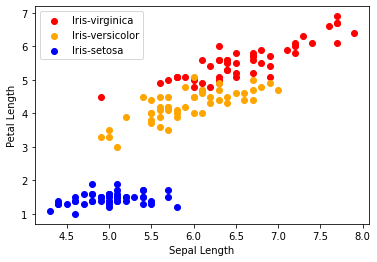

In [15]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

For Sepal length vs Petal length scatter plot, Setosa is again well seperated, but virginica and versicolour data points are still overlapping a little, although much better seperated as compared with Sepal length vs Sepal Width scatter plot.

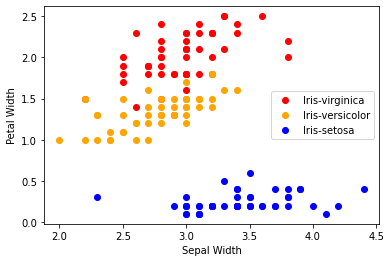

In [16]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

For Sepal width vs Petal width scatter plot, Setosa is again well seperated, but virginica and versicolour data points are still overlapping a little, although much better seperated as compared with Sepal length vs Sepal Width scatter plot.

### Correlation Matrix

In [17]:
# Finding correlation between the 4 features.

df.corr()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000

### Heat Map

Heatmap depicting the correlation between the features with different colour shades as per the correlation values


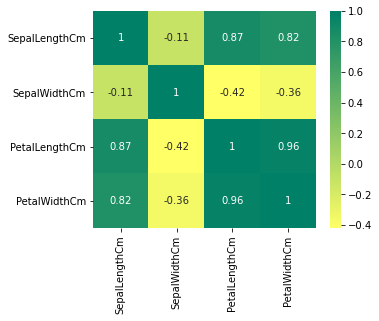

In [18]:
# Plotting the heatmap depicting the correlation between features with colour shades.

corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'summer_r')

The diagonal values are 1 as expected as they show relation of the feature with itself. Also, there is high positive correlation for Petal width with Sepal length and Petal length. Also, correlation between Petal length and Sepal length is positively high.

### Pair plot

Pair Plot  is a combination of the scatter plot and PDF (Probability Density Function) - the smoothened form of histogram.


<Figure size 432x288 with 0 Axes>

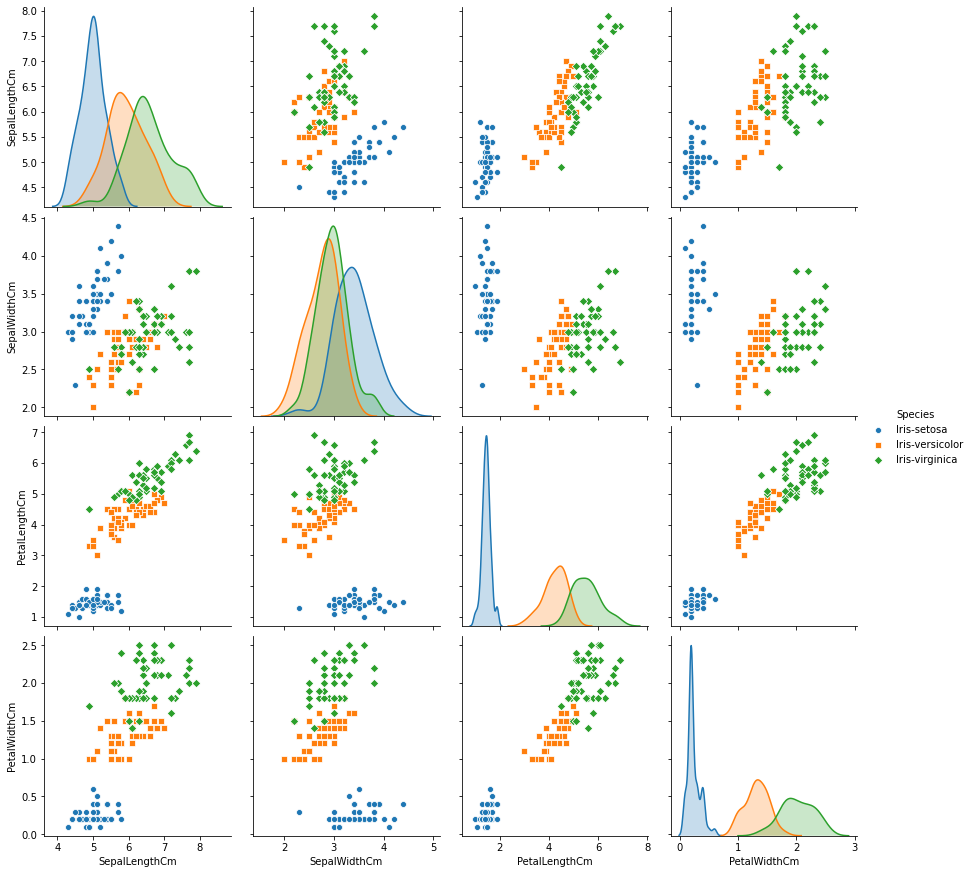

In [19]:
# Plotting pair plot among the features in the dataset.

plt.figure()
sns.pairplot( df,hue="Species", height=3, markers=["o", "s", "D"])
plt.show()

This plot is a combination of the scatter plot and PDF (Probability Density Function) - the smoothened form of histogram.

### Box Plot

Box plot shows the 0,25,50,75,100 percentiles of the feature values and any outliers if present. 

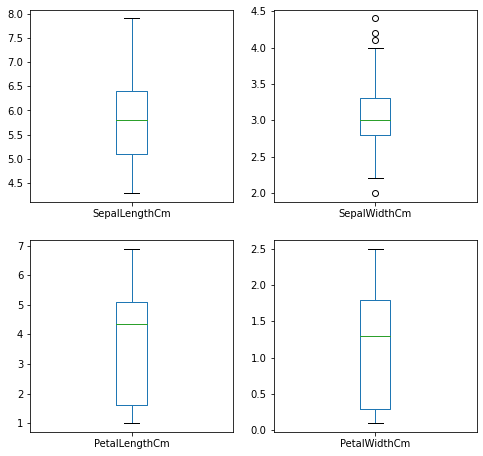

In [20]:
# Plotting the Box plots for the 4 features.

df.plot(kind='box',subplots=True,layout=(3,2),figsize=(8,12));

In SepalWidthCm, we can see some outliers.

### Violin Plot

Violin plots to show the probability density of the data at different values, usually smoothed by a kernel density estimator.


In [21]:
columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']


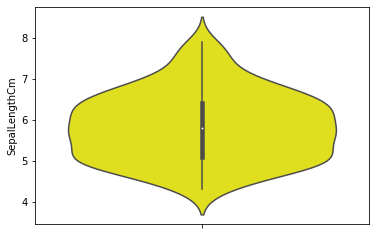

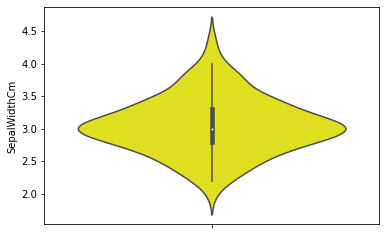

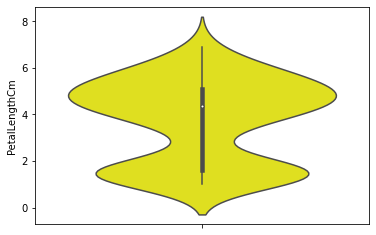

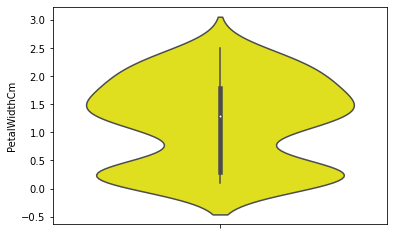

In [22]:
for i in range(4):
    ax = sns.violinplot(y=columns[i], data=df,subplots=True,color="Yellow")
    figsize=(8,8)
    ax.layout=(2,2)
    plt.show()

---
<a name = Section6></a>
## 6.  Label encoding for categorical variables

In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0

---
<a name = Section7></a>
## 7. Splitting X and y into Train and Test datasets

In [25]:
# Splitting dataset into 80:20 ratio.
# train - 80
# test - 20

from sklearn.model_selection import train_test_split

X = df.drop(columns=['Species'])
Y = df['Species']
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2,random_state=1)

In [26]:
X_Train.shape

(120, 4)

In [27]:
X_Test.shape

(30, 4)

In [28]:
Y_Train.shape

(120,)

In [29]:
Y_Test.shape

(30,)

---
<a name = Section8></a>
## 8. Data Scaling

In [30]:
# Feature Scaling to bring all the variables in a single scale.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_Train = sc.fit_transform(X_Train)
X_Test = sc.transform(X_Test)

In [31]:
X_Train

array([[ 0.31553662, -0.03612186,  0.44748582,  0.2345312 ],
       [ 2.2449325 , -0.03612186,  1.29803965,  1.39642889],
       [-0.2873996 , -1.240184  ,  0.0505607 , -0.15276803],
       [ 0.67729835, -0.51774672,  1.01452171,  1.13822941],
       [-0.04622511, -0.51774672,  0.73100376,  1.52552864],
       [-0.64916132,  1.64956512, -1.31032543, -1.31466572],
       [-0.40798684, -1.72180885,  0.10726429,  0.10543146],
       [-0.76974857,  0.92712784, -1.36702901, -1.31466572],
       [ 0.79788559, -0.51774672,  0.44748582,  0.36363094],
       [ 1.03906007, -1.240184  ,  1.12792888,  0.75093018],
       [ 1.15964732, -0.03612186,  0.95781812,  1.13822941],
       [-0.89033581,  1.16794027, -1.36702901, -1.18556598],
       [ 0.19494938, -1.96262128,  0.67430017,  0.36363094],
       [ 0.5567111 , -0.27693429,  1.01452171,  0.75093018],
       [ 0.91847283, -0.27693429,  0.44748582,  0.10543146],
       [ 2.2449325 , -0.99937157,  1.75166836,  1.39642889],
       [-0.16681235,  1.

In [32]:
X_Test

array([[-0.04622511,  2.3720024 , -1.48043619, -1.31466572],
       [-0.89033581, -1.240184  , -0.4597716 , -0.15276803],
       [ 0.91847283, -0.03612186,  0.33407864,  0.2345312 ],
       [-0.52857408,  2.13118998, -1.4237326 , -1.05646624],
       [ 2.48610699,  1.89037755,  1.46815041,  1.00912966],
       [ 0.5567111 ,  0.68631542,  0.50418941,  0.49273069],
       [ 1.28023456,  0.20469056,  0.73100376,  1.39642889],
       [-0.89033581,  1.89037755, -1.08351107, -1.05646624],
       [-1.37268478,  0.44550299, -1.25362184, -1.31466572],
       [ 1.28023456,  0.44550299,  1.07122529,  1.39642889],
       [-0.2873996 , -0.75855914,  0.22067147,  0.10543146],
       [-0.52857408,  2.13118998, -1.19691825, -1.05646624],
       [ 1.52140905, -0.03612186,  1.18463247,  1.13822941],
       [ 0.67729835,  0.44550299,  0.39078223,  0.36363094],
       [ 0.19494938, -0.27693429,  0.39078223,  0.36363094],
       [-1.73444651,  0.44550299, -1.4237326 , -1.31466572],
       [-0.04622511, -0.

In [33]:
Y_Train

91     1
135    2
69     1
128    2
114    2
      ..
133    2
137    2
72     1
140    2
37     0
Name: Species, Length: 120, dtype: int32

In [34]:
Y_Test

14     0
98     1
75     1
16     0
131    2
56     1
141    2
44     0
29     0
120    2
94     1
5      0
102    2
51     1
78     1
42     0
92     1
66     1
31     0
35     0
90     1
84     1
77     1
40     0
125    2
99     1
33     0
19     0
73     1
146    2
Name: Species, dtype: int32

---
<a name = Section9></a>
## 9. Model Creation and Evaluations

In [35]:
# Importing some metrics for evaluating results of our created models.

from sklearn.metrics import accuracy_score,classification_report

---
<a name = Section9.1></a>
### 9.1 Logistic Regression 

In [36]:
# Importing Logistic Regression from sklearn.linear_model library and creating an object of it  with hyper parameters C and penalty.

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(penalty='l2',C=2)

In [37]:
# model training
log_model.fit(X_Train, Y_Train)

LogisticRegression(C=2)

In [38]:
# Predicting
Y_Pred_Test_log=log_model.predict(X_Test)

In [39]:
Y_Pred_Test_log

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [40]:
print("Accuracy score for the test data is:",accuracy_score(Y_Test,Y_Pred_Test_log)*100)

Accuracy score for the test data is: 96.66666666666667


In [41]:
print(classification_report(Y_Test,Y_Pred_Test_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



---
<a name = Section9.2></a>
### 9.2 KNN-K-Nearest Neighbours

In [42]:
# Importing KNeighborsClassifier from sklearn.neighbors library and creating an object of it  with hyper parameters n_neighbors,weights and algorithm.

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto')

In [43]:
# model training
knn_model.fit(X_Train, Y_Train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [44]:
# Predicting
Y_Pred_Test_knn=knn_model.predict(X_Test)

In [45]:
Y_Pred_Test_knn

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2])

In [46]:
print("Accuracy score for the test data is:",accuracy_score(Y_Test,Y_Pred_Test_knn)*100)

Accuracy score for the test data is: 100.0


In [47]:
print(classification_report(Y_Test,Y_Pred_Test_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



---
<a name = Section9.3></a>
### 9.3 Decision Tree

In [48]:
# Importing DecisionTreeClassifier from sklearn.tree library and creating an object of it  with hyper parameters criterion,splitter and max_depth.

from sklearn.tree import DecisionTreeClassifier
dtr_model = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=6)

In [49]:
# model training
dtr_model.fit(X_Train, Y_Train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [50]:
# Predicting
Y_Pred_Test_dtr=dtr_model.predict(X_Test)

In [51]:
Y_Pred_Test_dtr

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [52]:
print("Accuracy score for the test data is:",accuracy_score(Y_Test,Y_Pred_Test_dtr)*100)

Accuracy score for the test data is: 96.66666666666667


In [53]:
print(classification_report(Y_Test,Y_Pred_Test_dtr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



---
<a name = Section9.4></a>
### 9.4 SVM with Polynomial Kernel

In [54]:
# Importing SVC from sklearn.svm library and creating an object of it with hyper parameters C, kernal and degree.

from sklearn.svm import SVC
svm_model1=SVC(C=500, kernel='poly',degree=3)

In [55]:
# model training
svm_model1.fit(X_Train, Y_Train)

SVC(C=500, kernel='poly')

In [56]:
# Predicting
Y_Pred_Test_svm1=svm_model1.predict(X_Test)

In [57]:
Y_Pred_Test_svm1

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [58]:
print("Accuracy score for the test data is:",accuracy_score(Y_Test,Y_Pred_Test_svm1)*100)

Accuracy score for the test data is: 96.66666666666667


In [59]:
print(classification_report(Y_Test,Y_Pred_Test_svm1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



---
<a name = Section9.5></a>
### 9.5 SVM with Linear Kernel

In [60]:
# Importing SVC from sklearn.svm library and creating an object of it with hyper parameters C and kernel.

from sklearn.svm import SVC
svm_model2=SVC(C=500, kernel='linear')

In [61]:
# model training
svm_model2.fit(X_Train, Y_Train)

SVC(C=500, kernel='linear')

In [62]:
# Predicting
Y_Pred_Test_svm2=svm_model2.predict(X_Test)

In [63]:
Y_Pred_Test_svm2

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2])

In [64]:
print("Accuracy score for the test data is:",accuracy_score(Y_Test,Y_Pred_Test_svm2)*100)

Accuracy score for the test data is: 100.0


In [65]:
print(classification_report(Y_Test,Y_Pred_Test_svm2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



---
<a name = Section10></a>
## 10. Model Evaluation Results

| Model                        |Accuracy Score|
|------------------------------|--------------|
| Logistic Regression          |96.67         |
| KNN-K-Nearest Neighbours     |100           |                               
| Decision Tree                |96.67         |  
| SVM with Polynomial Kernel   |96.67         |                           
| SVM with Linear Kernel       |100           |                  
                


We got highest accuracy Score of 100 for KNN and SVM with Linear Kernel models.

---
<a name = Section11></a>
## 11. Conclusions

* Our dataset was not very large and consisted of only 150 rows, with all the 3 species uniformly distributed.<br>

* PetalWidthCm was highly correlated with PetalLengthCm	

* PetalLengthCm was highly correlated with PetalWidthCm

* We tried with 5 different machine learning Classification models on the Iris Test data set to classify the flower into it's three species:<br> a) Iris Setosa<br> b) Iris Versicolour<br> c) Iris Virginica,<br>  based on the length and width of the flower's Petals and Sepals.


* We got very high accuracy score for all the models, and even the accuracy score of 100 for KNN and SVM with Linear Kernel models with some hyper parameter tuning maybe due to small size of dataset.